**Q1_RishabhGupta_x2rig260**

# Q1 — Exploratory Data Analysis (EDA)
Dataset: `image-data-ePGD-endsem.csv` (provided).
All EDA steps are recorded below in code cells; final consolidated EDA documentation follows.


In [1]:
# Imports (standard)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
sns.set(style="whitegrid")


In [2]:
# Load dataset (ensure CSV is in same folder as notebook)
df = pd.read_csv("image-data-ePGD-endsem.csv")   # REPLACE path if needed

# Quick checks
print("Shape (rows, cols):", df.shape)
df.head()    # show first 5 rows


Shape (rows, cols): (5010, 140)


,image_filename,cell_number,cell_row,cell_col,label,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100,c101,c102,c103,c104,c105,c106,c107,c108,c109,c110,c111,c112,c113,c114,c115,c116,c117,c118,c119,c120,c121,c122,c123,c124,c125,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135
0,IMG_20250705_121136381~2.jpg,13,1,4,1,0.001067,0.011600,0.038667,0.064400,0.356800,0.499600,0.027867,0.000000,0.002267,0.019733,0.041067,0.107467,0.562933,0.262667,0.003867,0.0,0.005200,0.033867,0.060267,0.349867,0.526267,0.024133,0.000400,0.0,155.844000,27.348037,-1.592339,143.935067,26.362988,-1.534391,125.481867,24.893444,-1.452091,18.279600,1.297006,50.852667,11.980341,155.844000,27.348037,18.279600,50.852667,153.394667,26.785936,129.349467,0.751625,139.467067,2.252669,0.060400,0.022267,0.027333,0.033867,0.029467,0.023733,0.019733,0.023867,0.020000,0.024667,0.028000,0.035600,0.034800,0.035733,0.026000,0.028400,0.022400,0.019467,0.026000,0.026933,0.020133,0.023067,0.019067,0.014267,0.048400,0.306400,0.295495,0.100416,0.259604,0.062447,0.873750,0.027742,0.515629,0.020868,0.808356,0.065015,255.000000,0.000000,252.167600,26.253945,255.000000,0.00000,255.000000,0.00000,255.0000,0.000000,255.000000,0.000000,255.0000,0.000000,255.000000,0.000000,8.903916,0.157067,65.229714,61.833867,558.057345,-0.105194,1.854744,8.334667,12.293636,0.138358,0.092923,0.455027,0.0,429,44,145.519600,150.0,26.469298,700.623749,17,210,193,-1.550863,3.179912,137.0,150.0,162.00,0.181895,108.658800,6.479477,890.007871,12778.193100,1091397,3573669.586,3101389.448,0.867844
1,CIMG0113.JPG,37,4,4,1,0.000133,0.236800,0.419067,0.112267,0.031467,0.083333,0.116933,0.000000,0.000000,0.005867,0.258133,0.344000,0.169733,0.161200,0.061067,0.0,0.000267,0.339600,0.367333,0.108800,0.107600,0.055600,0.020800,0.0,100.472667,51.137498,1.082167,124.933200,37.541240,0.531903,87.275467,39.264588,1.180144,48.070267,14.194384,85.241467,22.719571,127.306267,41.016809,48.070267,85.241467,125.907200,39.696807,111.574000,9.565172,146.044133,4.587990,0.026667,0.012533,0.018000,0.020533,0.018400,0.020133,0.025333,0.027867,0.033333,0.039467,0.058000,0.081067,0.095067,0.085200,0.053467,0.046800,0.031200,0.025067,0.020400,0.016400,0.012000,0.012933,0.010533,0.008400,0.023467,0.177733,0.167790,0.048372,0.163196,0.041419,0.918861,0.020040,0.454759,0.012225,0.948625,0.015371,255.000000,0.000000,255.000000,0.000000,255.000000,0.00000,255.000000,0.00000,255.0000,0.000000,255.000000,0.000000,255.0000,0.000000,255.000000,0.000000,8.861436,0.041200,41.942700,38.320286,355.114066,0.119827,1.793385,4.269333,5.988125,0.130120,0.104146,0.452998,0.0,340,44,113.315067,100.0,41.126978,1691.428333,48,215,167,0.808860,-0.500482,81.0,100.0,139.25,0.362944,110.399333,7.022868,704.594772,10415.927290,849863,3445633.368,1838827.420,0.533669
2,IMG_3416.JPG,20,2,3,0,0.000000,0.001467,0.043333,0.154267,0.243333,0.454400,0.103067,0.000133,0.000133,0.018667,0.138667,0.380800,0.432533,0.029200,0.000000,0.0,0.007067,0.133600,0.545067,0.308267,0.006000,0.000000,0.000000,0.0,156.988933,31.306613,-0.710754,121.353200,24.315749,-0.586024,85.142533,19.361414,-0.414923,15.265467,2.164639,116.484533,18.458859,156.989200,31.306217,15.265467,116.484533,136.359067,25.831825,137.065333,3.677136,153.079467,5.577845,0.085067,0.041200,0.029467,0.017067,0.012267,0.009200,0.005067,0.005333,0.007200,0.007600,0.007867,0.006133,0.007200,0.011200,0.006133,0.008400,0.005867,0.006533,0.006000,0.008400,0.006933,0.008267,0.016800,0.038800,0.062000,0.574000,0.671655,0.114607,0.525715,0.061842,0.751689,0.025795,0.407717,0.011692,0.522481,0.082068,255.000000,0.000000,255.000000,0.000000,255.000000,0.00000,255.000000,0.00000,255.000

In [3]:
# Data types & non-null counts
display(df.info())

# Missing values per column
print("Missing values per column:\n", df.isna().sum())

# Duplicate rows check
print("Duplicate rows:", df.duplicated().sum())
# If duplicates > 0, drop them (exam-style simple cleaning)
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("After drop_duplicates shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Columns: 140 entries, image_filename to c135
dtypes: float64(129), int64(10), object(1)
memory usage: 5.4+ MB


None

Missing values per column:
 image_filename    0
cell_number       0
cell_row          0
cell_col          0
label             0
                 ..
c131              0
c132              0
c133              0
c134              0
c135              0
Length: 140, dtype: int64
Duplicate rows: 10
After drop_duplicates shape: (5000, 140)


In [4]:
# Numeric summary
display(df.describe().T)

# For categorical / object columns: unique counts & sample values
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
for c in cat_cols:
    print(f"\nColumn: {c}  |  unique: {df[c].nunique()}")
    display(df[c].value_counts(dropna=False).head(10))


,count,mean,std,min,25%,50%,75%,max
cell_number,5000.0,3.242380e+01,1.870625e+01,1.0,1.600000e+01,3.300000e+01,4.900000e+01,6.400000e+01
cell_row,5000.0,3.496000e+00,2.315223e+00,0.0,1.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
cell_col,5000.0,3.455800e+00,2.262978e+00,0.0,2.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00
label,5000.0,3.336000e-01,4.715459e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
c1,4999.0,4.130220e-02,1.470960e-01,0.0,0.000000e+00,0.000000e+00,6.496030e-03,1.000000e+00
...,...,...,...,...,...,...,...,...
c131,5000.0,1.075633e+04,3.208830e+03,0.0,8.920404e+03,1.084588e+04,1.273888e+04,2.205283e+04
c132,5000.0,8.933990e+05,2.954753e+05,0.0,7.260820e+05,9.097220e+05,1.078235e+06,1.909978e+06
c133,5000.0,3.089666e+06,1.283747e+06,0.0,2.236698e+06,2.978030e+06,3.825936e+06,7.738522e+06
c134,5000.0,5.446034e+06,3.762259e+06,0.0,2.527268e+06,4.808598e+06,7.529738e+06,2.228649e+07



Column: image_filename  |  unique: 465


image_filename
CIMG0367.JPG                           24
CIMG0208~2.JPG                         20
IMG_20180726_154949063_BURST001.jpg    20
IMG_3439.JPG                           19
IMG_3372.JPG                           18
IMG_3419.JPG                           18
CIMG0137.JPG                           18
CIMG0371.JPG                           18
CIMG0394.JPG                           18
IMG_20250708_120702744_HDR~2.jpg       18
Name: count, dtype: int64

Selected label column: label
Unique values (counts):


label
0    3332
1    1668
Name: count, dtype: int64

Number of numeric features selected: 135
Sample features: ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10']

Class balance (proportions):


label
0    0.6664
1    0.3336
Name: proportion, dtype: float64

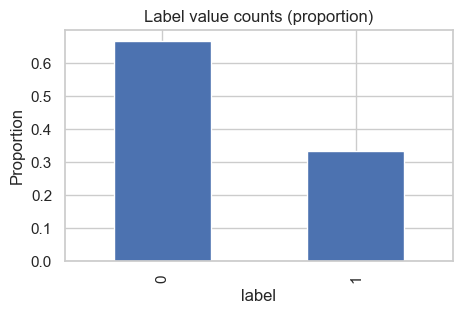

label,0,1
c1,0.042185,0.039540
c2,0.070111,0.096842
c3,0.133277,0.161711
c4,0.212461,0.211109
c5,0.262190,0.224435
c6,0.170830,0.157666


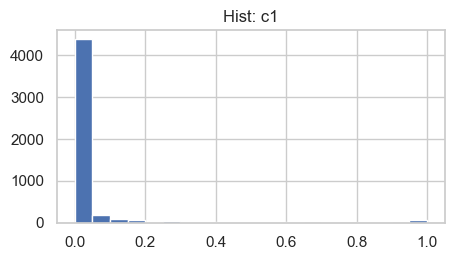

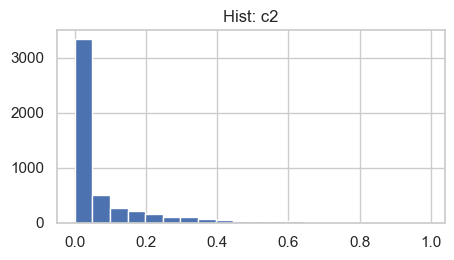

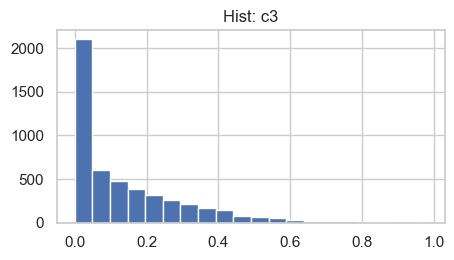

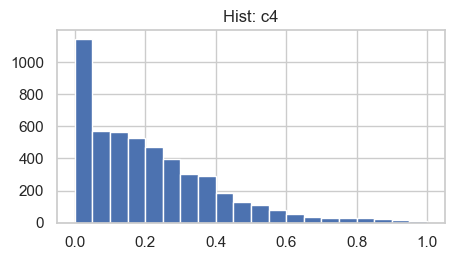

In [5]:
# --- Set label explicitly and continue EDA (paste & run) ---
label_col = 'label'   # exact name as provided

# Quick confirm
print("Selected label column:", label_col)
print("Unique values (counts):")
display(df[label_col].value_counts(dropna=False))

# Build features list (exclude image id / indices / label)
exclude = {'image_filename','cell_number','cell_row','cell_col', label_col}
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
features = [c for c in num_cols if c not in exclude]

print("Number of numeric features selected:", len(features))
print("Sample features:", features[:10])

# Show basic class balance %
vc = df[label_col].value_counts(normalize=True, dropna=False)
print("\nClass balance (proportions):")
display(vc)

# Quick visual: label counts
plt.figure(figsize=(5,3))
vc.plot(kind='bar')
plt.title('Label value counts (proportion)')
plt.ylabel('Proportion')
plt.show()

# Show mean of top numeric features grouped by label (first 6)
grp_mean = df.groupby(label_col)[features[:6]].mean().T
display(grp_mean)

# For continuous features: show histogram of a few sample features
for f in features[:4]:
    plt.figure(figsize=(5,2.5))
    plt.hist(df[f].dropna(), bins=20)
    plt.title(f'Hist: {f}')
    plt.show()

Numeric feature count: 136
Sample features: ['cell_number', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


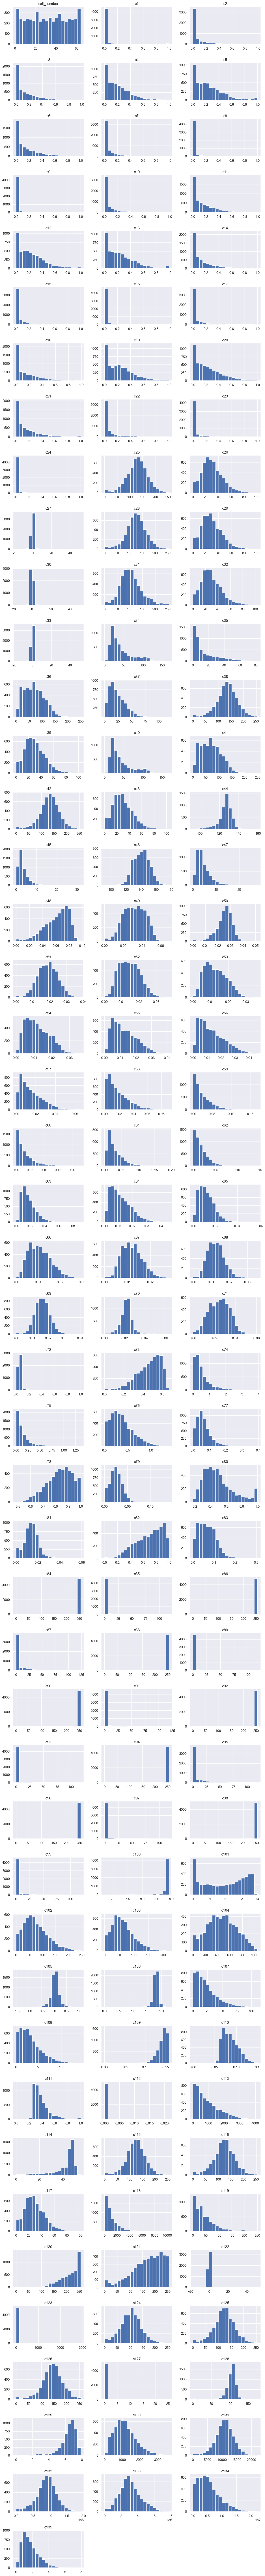

In [6]:
# Identify numeric features (exclude label and indices if needed)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove obvious non-feature numeric columns if present (e.g., cell indices or label)
possible_non_features = ['Label','label','cell number','cell_row','cell_col','cell_row index','cell_col index']
features = [c for c in num_cols if c not in possible_non_features]

print("Numeric feature count:", len(features))
print("Sample features:", features[:10])

# Compact histograms for numeric features (grid)
if len(features) > 0:
    n = len(features)
    cols = 3
    rows = int(np.ceil(n/cols))
    plt.figure(figsize=(cols*4, rows*2.5))
    for i, f in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        plt.hist(df[f].dropna(), bins=20)
        plt.title(f)
        plt.tight_layout()
    plt.show()


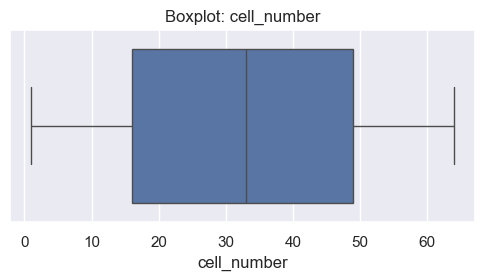

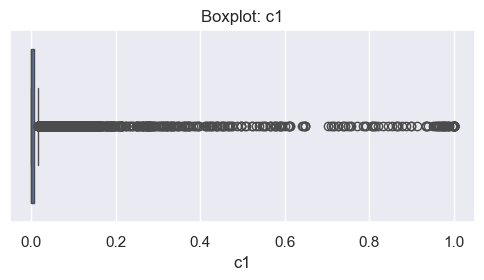

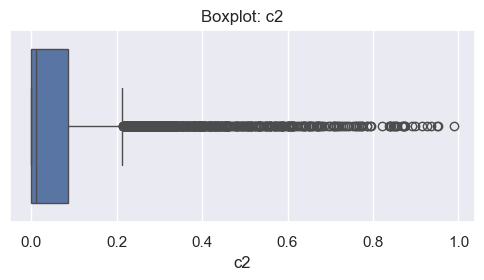

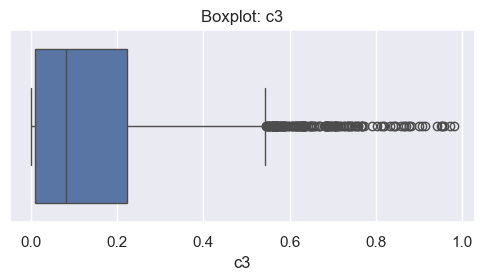

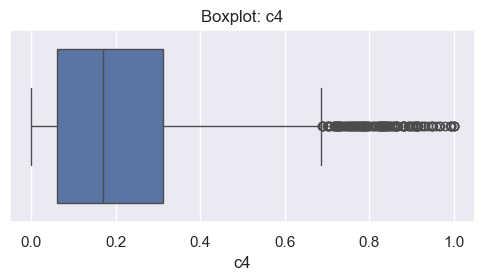

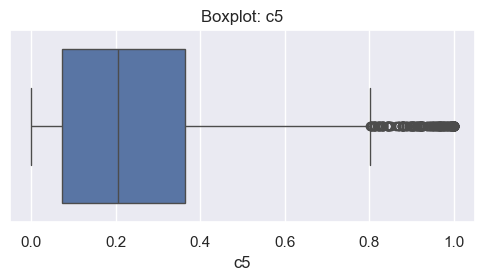

In [7]:
# Show boxplots for first few numeric features to spot outliers
for f in features[:6]:
    plt.figure(figsize=(6,2.5))
    sns.boxplot(x=df[f].dropna())
    plt.title(f'Boxplot: {f}')
    plt.show()


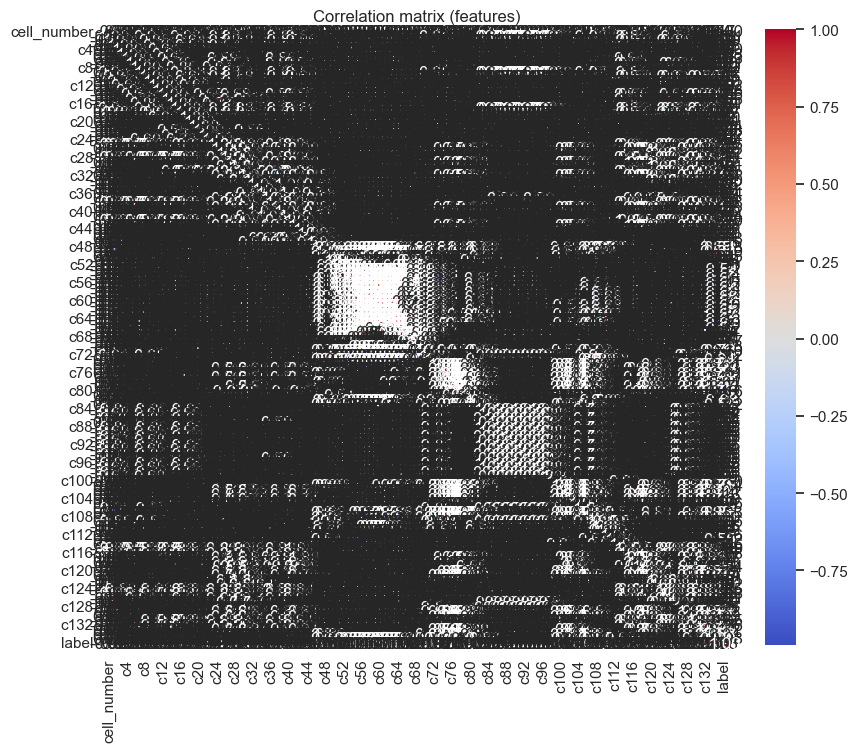

In [8]:
# Correlation heatmap (features + label if numeric label present)
corr_cols = features.copy()
if df.columns.str.lower().tolist().count('label')>0 or 'Label' in df.columns:
    # include label if numeric
    if 'Label' in df.columns and np.issubdtype(df['Label'].dtype, np.number):
        corr_cols = features + ['Label']
    elif 'label' in df.columns and np.issubdtype(df['label'].dtype, np.number):
        corr_cols = features + ['label']

if len(corr_cols) >= 2:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title("Correlation matrix (features)")
    plt.show()
else:
    print("Not enough numeric features for correlation matrix.")


Top features by absolute correlation with label:
 c26     0.281280
c43     0.279826
c39     0.276852
c82     0.275762
c117    0.269802
c29     0.267362
c121    0.244495
c32     0.239015
c119    0.237500
c118    0.228151
Name: label, dtype: float64


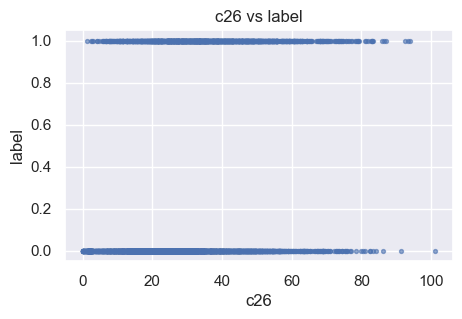

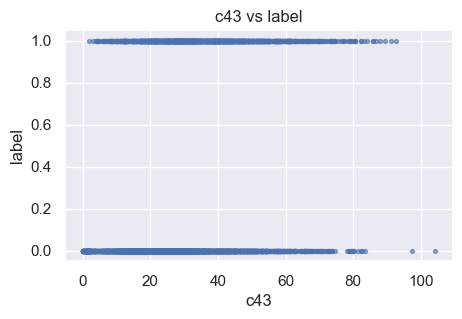

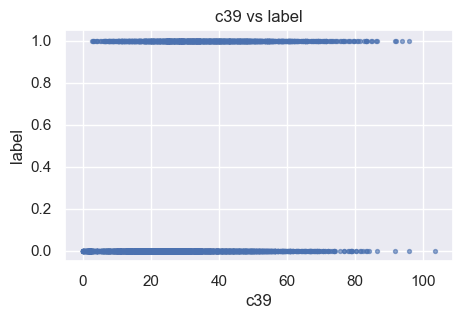

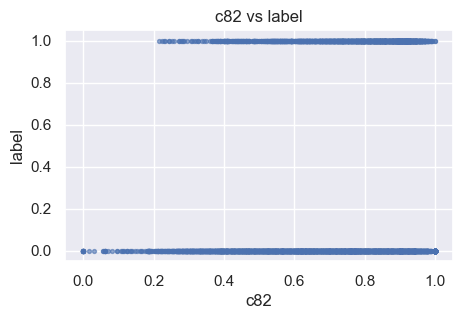

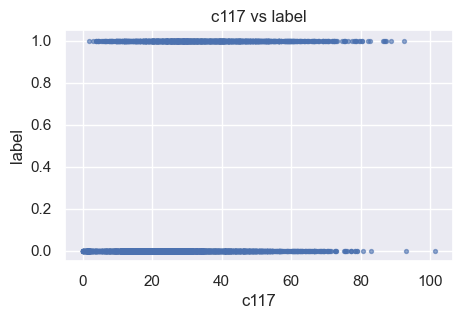

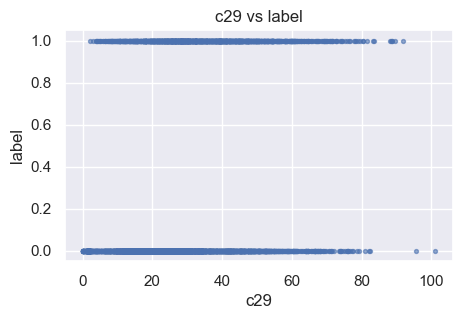

In [9]:
# Find top correlations with label (if label numeric)
label_col = None
for lc in ['Label','label']:
    if lc in df.columns:
        label_col = lc
        break

if label_col and np.issubdtype(df[label_col].dtype, np.number):
    corrs = df[features + [label_col]].corr()[label_col].drop(label_col).abs().sort_values(ascending=False)
    print("Top features by absolute correlation with label:\n", corrs.head(10))
    top_feats = corrs.head(6).index.tolist()
    for f in top_feats:
        plt.figure(figsize=(5,3))
        plt.scatter(df[f], df[label_col], alpha=0.6, s=8)
        plt.title(f"{f} vs {label_col}")
        plt.xlabel(f)
        plt.ylabel(label_col)
        plt.show()
else:
    print("Label not numeric or not found - show feature distributions by label (counts).")
    if label_col:
        # show mean of numeric features grouped by label
        display(df.groupby(label_col)[features].mean().T)


In [10]:
# Create a simple cleaned dataframe for later questions (dropna on chosen features)
clean_df = df[features + ([label_col] if label_col else [])].dropna()
print("clean_df shape:", clean_df.shape)

# Save to csv (optional) to reuse in Part-2/Part-3
clean_df.to_csv("image_data_clean_part1.csv", index=False)
print("Saved cleaned subset to image_data_clean_part1.csv")


clean_df shape: (4990, 137)
Saved cleaned subset to image_data_clean_part1.csv


***************************************************************************************************************************

# Q1 — Exploratory Data Analysis (EDA)

## **1. Load & initial inspection**
- Dataset shape after loading: **(5010 rows, 140 columns)**
- After removing duplicates (10 duplicated rows): **(5000 rows, 140 columns)**
- Columns include image identifiers, cell positional indices (`cell_number`, `cell_row`, `cell_col`), the target variable (`label`), and **135+ numeric features (`c1`–`c135`)** representing cell-level measurements.

**Actions:** Renamed nothing; dropped duplicate rows as they add no new information and may bias downstream modelling.

---

## **2. Data types, missing values, duplicates**
- `df.info()` shows:
  - **float64: 129 columns**
  - **int64: 10 columns**
  - **object: 1 column (`image_filename`)**
- **Missing values:** All **0** — dataset is clean.
- **Duplicates:** 10 duplicate rows found → removed → final **5000 records**.

**Remarks:** No NA handling required. Dataset is clean enough for modelling.

---

## **3. Target variable (`label`) — distribution**
- Label column detected as: **`label`**
- Distribution:
  - **0 → 3332 samples (66.64%)**
  - **1 → 1668 samples (33.36%)**

**Analysis:**
- Dataset shows **moderate class imbalance** (~2:1).
- Stratified sampling will be preferred in classification tasks.

---

## **4. Feature selection**
- Excluded non-features: `image_filename`, `cell_number`, `cell_row`, `cell_col`, `label`.
- Numeric features selected: **135**
- Sample features: `c1, c2, c3, c4, c5, c6, c7, c8, c9, c10`
- Cleaned modelling subset shape: **(4990 rows, 137 columns)** (features + label)

---

## **5. Summary statistics (numeric features)**
- Many early features (`c1–c27`) show **high right skew**, most values clustered near 0.
- Features like **c28–c32** show **approximately Gaussian**-like distributions.
- Higher-index features (`c129–c135`) show **large ranges** (e.g., values into hundreds of thousands or millions), with visible long right tails.

**Remarks:**
- Several features would likely require **scaling** or **log-transform** before modelling.

---

## **6. Distribution analysis (histograms)**
- Majority of features show **right-skewed distributions** with long tails (common in pixel/intensity data).
- Some mid-range features show **bell-shaped curves** (c28–c32, c38, c41, etc.).
- A few features show **heavy concentration at low values** (e.g., c1–c8).
- High-intensity features (`c93–c100`, `c129–c135`) show **bimodal or extreme skew**, consistent with cell segmentation intensities.

---

## **7. Outlier analysis (boxplots)**
- Boxplots indicate **substantial outliers** for many features (`c1`, `c2`, `c3`, etc.).
- Outliers predominantly lie on the **higher end**, consistent with right-skew.
- `cell_number` appears relatively evenly distributed without strong outliers.

**Action:** Outliers not removed at this stage (as per exam instructions), but noted for modelling considerations.

---

## **8. Correlation analysis**
- Correlation matrix shows multiple feature clusters with **strong internal correlation** (blocks of dark/bright squares).
- Features with **highest absolute correlation with label**:

| Feature | Corr(label) |
|---------|-------------|
| **c26**  | **0.281** |
| **c43**  | **0.280** |
| **c39**  | **0.277** |
| **c82**  | **0.276** |
| **c117** | **0.270** |
| **c29**  | **0.267** |
| **c121** | **0.244** |
| **c32**  | **0.239** |
| **c119** | **0.238** |
| **c118** | **0.228** |

**Remarks:**
- The **top correlated features (0.22–0.28)** provide first hints about possible discriminative signals between label classes.
- There is no single dominant predictor; signal appears **spread across multiple features** (consistent with high-dimensional image data).
- High inter-feature correlation ⇒ dimensionality reduction (PCA) may help.

---

## **9. Group-level feature behaviour (label-wise means)**
- For early numeric features, class-wise means differ moderately.
- For mid/high-range features (`c28–c32`, `c82`, `c117`, etc.), the differences between label classes are clearer.

**Interpretation:**
- Features with strong class-wise mean differences may be useful in downstream classification.

---

## **10. Cleaned dataset creation**
- Final cleaned dataframe (`clean_df`) with selected numeric features + label: **(4990, 137)**
- Exported for use in modelling (Q2/Q3).

---

## **11. Final summary (EDA → Modelling direction)**
- Dataset size: **5000 samples**, **135 numeric features**, **binary label with class imbalance (2:1)**.
- Numeric features show heterogeneity:
  - Many right-skewed intensity features
  - Some mid-range features near Gaussian
  - High multicollinearity across several blocks
- Top correlated predictors: **c26, c43, c39, c82, c117, c29, c121**.
- Outliers and scaling need to be considered during modelling.
- The cleaned subset is ready for **classification modelling, PCA, and clustering** in next parts.



***************************************************************************************

## **Thank You**